In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import pylab

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
loans_income = pd.read_csv('/content/sample_data/loans_income.csv')
sp500_px = pd.read_csv('/content/sample_data/sp500_px.csv')

In [5]:
#Take a 1000 Samples
samples = loans_income.sample(n=1000)
samples

,x
19220,40000
38111,27336
5286,65000
42101,86000
22668,105000
...,...
44645,73000
39391,50000
5248,140000
40193,80000


In [6]:
samples.shape

(1000, 1)

In [7]:
samples.head

<bound method NDFrame.head of             x
19220   40000
38111   27336
5286    65000
42101   86000
22668  105000
...       ...
44645   73000
39391   50000
5248   140000
40193   80000
25191   40000

[1000 rows x 1 columns]>

In [8]:
#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5 = sample_mean_5.dropna()
sample_mean_5

22668    64667.2
13109    64467.2
35618    68740.2
11346    77740.2
17877    75396.2
          ...   
44645    66900.0
39391    65900.0
5248     78900.0
40193    82900.0
25191    76600.0
Name: x, Length: 996, dtype: float64

In [9]:
#mean of 20 numbers
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()
sample_mean_20

4245     71162.15
44525    70440.55
1874     72573.75
26823    72143.75
18992    71093.75
           ...   
44645    73330.30
39391    73580.30
5248     77830.30
40193    79651.50
25191    74651.50
Name: x, Length: 981, dtype: float64

In [10]:
# mean of 30 numbers
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()
sample_mean_30

14705    75239.700000
17448    76739.700000
49442    77661.833333
39713    79095.166667
24078    79228.500000
             ...     
44645    70773.533333
39391    69773.533333
5248     71940.200000
40193    72773.533333
25191    70440.200000
Name: x, Length: 971, dtype: float64

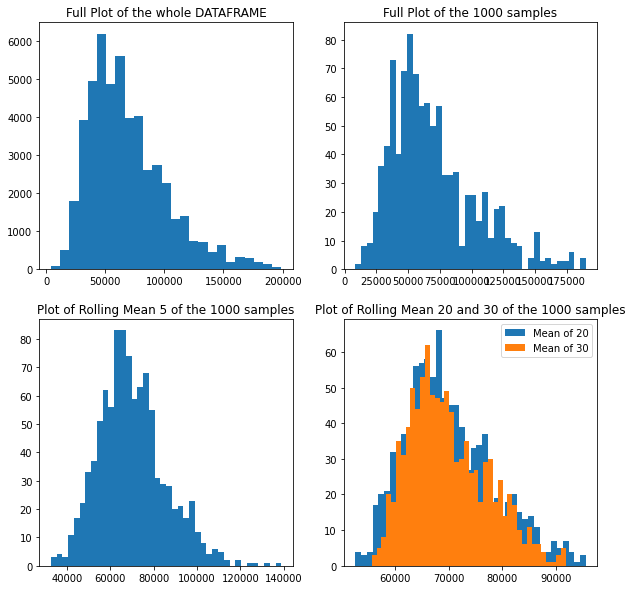

In [11]:
fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')
ax.legend()
plt.show()

plt.show()


In [12]:
#Calculating a rolling mean:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


In [13]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
len(arr_bootstraps)

3

In [14]:
#Calculating a rolling mean:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',np.std(arr_bootstraps[i],ddof=1))
    print('Bootstrap Mean : ',np.mean(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',loans_income.x.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',stats.sem(arr_bootstraps[i], ddof=1))
    print('\n------------------------------------------------------------------------------\n')

Bootstrap Stats for 1000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  33848.76769437629
Bootstrap Mean :  68119.976
Bootstrap Median:  60000.0
Boostrap Bias,  640.5424400000047
Standard Error: 1070.3920190415529

------------------------------------------------------------------------------

Bootstrap Stats for 10000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32614.81066159466
Bootstrap Mean :  68636.8429
Bootstrap Median:  62000.0
Boostrap Bias,  123.67553999999654
Standard Error: 326.1481066159466

------------------------------------------------------------------------------

Bootstrap Stats for 20000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32748.17706882234
Bootstrap Mean :  68554.04975
Bootstrap Median:  62000.0
Boostrap Bias,  206.46868999999424
Standard Error: 231.56458076862071

------

In [15]:
stats.probplot(loans_income.x, dist="norm", plot=pylab
pylab.show()

SyntaxError: ignored

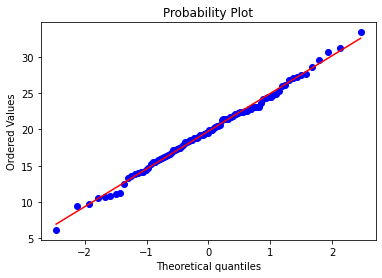

In [16]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [17]:
nflx = sp500_px.loc[:,'NFLX']

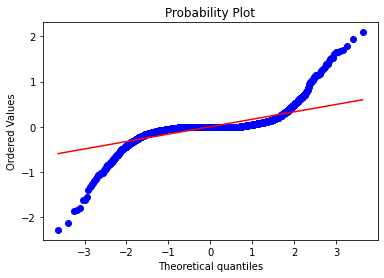

In [18]:
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


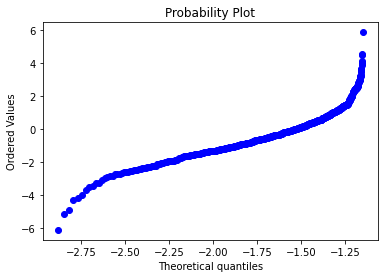

In [19]:
# After standardizing tread

treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()